In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import numpy as np
from time import time
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

In [10]:
def harmonic_potential(xy):
    return np.sum(xy**2) / 2

In [11]:
def harmonic_potential(xy):
    return np.sum(xy**2) / 2

def grad_harmonic_potential(xy):
    return np.array(xy)

"""
position r
momentum p
time step dt
mass m
"""
def velocity_verlet_step(r, p, dt, m):
    r_new = r + dt / m * p - 0.5 * dt**2 / m * grad_harmonic_potential(r)
    p_new = p - dt / 2 * (grad_harmonic_potential(r) + grad_harmonic_potential(r_new))
    return r_new, p_new

def velocity_verlet(r_ini, p_ini, dt = 0.01, m = 1, steps = 10):
    pos = np.zeros([steps + 1, 2])
    pos[0] = r_ini
    momenta = np.zeros([steps + 1, 2])
    momenta[0] = p_ini
    for i in range (0, steps):
        pos[i+1], momenta[i+1] = velocity_verlet_step(pos[i], momenta[i], dt, m)  
    return pos, momenta

In [12]:
r_ini = np.array([1,0])
p_ini = np.array([0,100])
number_steps = 1000

#pos, mom = velocity_verlet(r_ini, p_ini, steps = number_steps)
#pos.shape

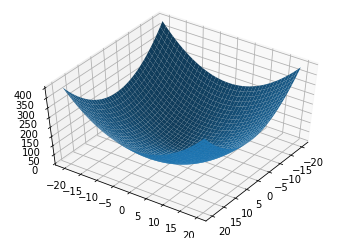

In [36]:
# set up a figure twice as wide as it is tall
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y**2) / 2
#ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
surf = ax.plot_surface(X, Y, Z)
# rotate the axes and update
ax.view_init(50, 35)


r_ini = np.array([-15, 0])
p_ini = np.array([0, 0])
number_steps = 1000
pos, momenta = velocity_verlet(r_ini, p_ini, dt=0.1, steps=number_steps)
x = pos[:, 0]
y = pos[:, 1]
z = (x**2 + y**2) / 2 + 0.1

#plt.plot([x[0]], [y[0]], zs=0, marker="o", markersize=10)
#plt.plot(x,y,z)
ims = []
for i in np.arange(0, 200, 5):
    ims.append(plt.plot([x[i]], [y[i]], zs=z[i], marker="o", markersize=10, c="orange"))
    
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000,
                                   blit=True)


#plt.show()

In [37]:
HTML(im_ani.to_html5_video())

In [32]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [35]:
im_ani